# Imports

In [121]:
# Importing the libraries
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
path_raw_data = "/Data/"

In [224]:
# Importing the dataset ETF Prices
etf_prices = pd.read_csv('data/ETF prices.csv')
etf_prices

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
3866025,ZSL,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
3866026,ZSL,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
3866027,ZSL,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
3866028,ZSL,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


In [166]:
# Importing the dataset ETFs
etf = pd.read_csv('data/ETFs.csv')
etf

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [7]:
# Importing the dataset Mutual Funds
mutual_fund = pd.read_csv('data/MutualFunds.csv')
mutual_fund

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,ZVNIX,MutualFund,US,Fidelity Advisor Small Cap Valu,Fidelity Advisor Small Cap Value Fund Class M,USD,50000.0,500.0,Large Growth,Fidelity Investments,...,2.70,5.81,10.53,7.25,10.14,11.97,7.25,5.30,7.54,8.90
23779,VHYAX,MutualFund,US,Capital World Bond Fund - Class,American Funds Capital World Bond Fund Class 5...,USD,3000.0,1.0,Large Value,American Funds,...,5.00,9.11,10.83,7.04,10.48,12.42,7.84,5.83,7.71,9.30
23780,VIAAX,MutualFund,US,Capital World Growth and Income,American Funds Capital World Growth and Income...,USD,3000.0,1.0,Foreign Large Growth,American Funds,...,3.87,6.22,8.53,7.25,8.96,11.96,7.70,5.79,7.42,8.78
23781,VIHAX,MutualFund,US,Templeton China World Cl R6,Templeton China World Fund Class R6,USD,3000.0,1.0,Foreign Large Value,Franklin Templeton Investments,...,5.35,11.49,9.55,6.59,9.24,11.66,8.79,5.79,8.10,10.85


In [144]:
mf_prices_ae_df = pd.read_csv("data\MutualFund prices - A-E.csv")
mf_prices_fk_df = pd.read_csv("data\MutualFund prices - F-K.csv")
mf_prices_lp_df = pd.read_csv("data\MutualFund prices - L-P.csv")
mf_prices_qz_df = pd.read_csv("data\MutualFund prices - Q-Z.csv")
mf_prices = pd.concat([mf_prices_ae_df, mf_prices_fk_df, mf_prices_lp_df, mf_prices_qz_df], ignore_index=True)

In [145]:
mf_prices

,fund_symbol,price_date,nav_per_share
0,AAAAX,2007-07-31,10.02
1,AAAAX,2007-08-01,9.98
2,AAAAX,2007-08-02,10.01
3,AAAAX,2007-08-03,9.90
4,AAAAX,2007-08-06,9.93
...,...,...,...
75657734,ZVNIX,2021-11-23,42.88
75657735,ZVNIX,2021-11-24,43.74
75657736,ZVNIX,2021-11-26,43.19
75657737,ZVNIX,2021-11-29,43.75


In [167]:
# Export to csv for later use
mf_prices.to_csv('data/mf_prices.csv', index=False)

# Data Cleaning

## Mutual funds dataset cleaning

In [37]:
# checking for missing values
list(round(100*(mutual_fund.isnull().sum()/len(mutual_fund.index)), 2))
# checking for missing values with % of missing values more than 30%
missing = round(100*(mutual_fund.isnull().sum()/len(mutual_fund.index)), 2)
missing = missing[missing > 30]
print(missing)

initial_investment               30.69
subsequent_investment            62.40
last_cap_gain                    99.97
fund_max_12b1_fee                54.20
fund_max_front_end_sales_load    84.47
                                 ...  
peer_social_max                  37.61
governance_score                 35.30
peer_governance_min              37.61
peer_governance_avg              37.61
peer_governance_max              37.61
Length: 119, dtype: float64


In [38]:
# % of missing values more than 50%
missing[missing > 50]

subsequent_investment            62.40
last_cap_gain                    99.97
fund_max_12b1_fee                54.20
fund_max_front_end_sales_load    84.47
fund_max_deferred_sales_load     87.37
                                 ...  
fund_return_2001_q1              79.04
fund_return_2000_q4              83.37
fund_return_2000_q3              82.98
fund_return_2000_q2              82.41
fund_return_2000_q1              81.83
Length: 73, dtype: float64

Many columns present with HIGH percentage of missing values. Better to select columns of interest first.

In [11]:
# Checking the columns to use
print(len(list(mutual_fund.columns)))
print(list(mutual_fund.columns))

298
['fund_symbol', 'quote_type', 'region', 'fund_short_name', 'fund_long_name', 'currency', 'initial_investment', 'subsequent_investment', 'fund_category', 'fund_family', 'exchange_code', 'exchange_name', 'exchange_timezone', 'management_name', 'management_bio', 'management_start_date', 'total_net_assets', 'year_to_date_return', 'day50_moving_average', 'day200_moving_average', 'week52_high_low_change', 'week52_high_low_change_perc', 'week52_high', 'week52_high_change', 'week52_high_change_perc', 'week52_low', 'week52_low_change', 'week52_low_change_perc', 'investment_strategy', 'fund_yield', 'morningstar_overall_rating', 'morningstar_risk_rating', 'inception_date', 'last_dividend', 'last_cap_gain', 'annual_holdings_turnover', 'investment_type', 'size_type', 'fund_annual_report_net_expense_ratio', 'category_annual_report_net_expense_ratio', 'fund_prospectus_net_expense_ratio', 'fund_prospectus_gross_expense_ratio', 'fund_max_12b1_fee', 'fund_max_front_end_sales_load', 'category_max_fro

In [69]:
# Selecting columns to use
categorical_var = ['fund_symbol', 'fund_long_name','exchange_name', 'investment_type', 'size_type', 'fund_category']
measurable_var = ['total_net_assets', 'fund_price_earning_ratio', 'fund_return_1year',
 'category_return_1year',
 'fund_return_5years',
 'category_return_5years',
 'fund_return_10years',
 'category_return_10years',
 'fund_annual_report_net_expense_ratio',
 'social_score', 'governance_score', 'environment_score', 'esg_score','sustainability_score']

In [70]:
# Missing values in the categorical and measurable variables
categorical_missing_values = mutual_fund[categorical_var].isna().sum()
measurable_missing_values = mutual_fund[measurable_var].isna().sum()

In [71]:
print(categorical_missing_values)

fund_symbol        0
fund_long_name     0
exchange_name      0
investment_type    0
size_type          0
fund_category      0
dtype: int64


In [72]:
print(measurable_missing_values)

total_net_assets                            4
fund_price_earning_ratio                 5685
fund_return_1year                         640
category_return_1year                     158
fund_return_5years                       5999
category_return_5years                    158
fund_return_10years                     10274
category_return_10years                   376
fund_annual_report_net_expense_ratio      184
social_score                             7362
governance_score                         7362
environment_score                        7362
esg_score                                7343
sustainability_score                     7343
dtype: int64


Eliminating Missing values

In [73]:
# Drop rows where all the performance columns are null
mutual_fund = mutual_fund.dropna(subset=categorical_var + measurable_var, how='all') 
# Drop Null values in the categorical columns
mutual_fund = mutual_fund.dropna(subset=['fund_long_name','investment_type', 'size_type', 'fund_category'])

print(len(mutual_fund))

22020


In [79]:
# Date time conversion
mutual_fund[['inception_date', 'returns_as_of_date', 'management_start_date']] = mutual_fund[['inception_date', 'returns_as_of_date', 'management_start_date']].apply(pd.to_datetime)

### NOT NEEDED MF Produce Unpivoted Dataset for PowerBI visualization 

In [168]:
"""1_eda_ExchangeTradedFunds.ipynb
# Selecting Columns to use
df_mf = mutual_fund[[
    'fund_symbol', 'fund_long_name','exchange_name', 'investment_type', 'size_type', 'fund_category'
]]
mf_info = df_mf.copy()
mf_info.head()

# Scores
scores_cols = [
    'social_score',
    'governance_score',
    'environment_score',
    'esg_score',
    'sustainability_score'
]

df_sum_stats = pd.melt(mutual_fund, id_vars =['fund_symbol'], value_vars = scores_cols)

df_sum_stats['data_category'] = 'score stats'

mf_scores = df_sum_stats.copy()

mf_scores

# Assests
asset_cols = ['total_net_assets']


df_asset = pd.melt(mutual_fund, id_vars = ['fund_symbol'], value_vars =asset_cols)

df_asset['data_category'] = 'asset percentages'

mf_asset = df_asset.head().copy()

mf_asset

# Returns & expense ratio
return_cols = [
 'fund_return_1year',
 'category_return_1year',
 'fund_return_5years',
 'category_return_5years',
 'fund_return_10years',
 'category_return_10years'
 ]

df_return = pd.melt(mutual_fund, id_vars = ['fund_symbol'], value_vars = return_cols)

df_return['data_category'] = 'returns'

mf_return = df_return.copy()

mf_return

#  list of data frames to append

append_frames = [df_asset, df_return, df_sum_stats]

df_sub_frames  = pd.concat(append_frames)

df_sub_frames
"""

"1_eda_ExchangeTradedFunds.ipynb\n# Selecting Columns to use\ndf_mf = mutual_fund[[\n    'fund_symbol', 'fund_long_name','exchange_name', 'investment_type', 'size_type', 'fund_category'\n]]\nmf_info = df_mf.copy()\nmf_info.head()\n\n# Scores\nscores_cols = [\n    'social_score',\n    'governance_score',\n    'environment_score',\n    'esg_score',\n    'sustainability_score'\n]\n\ndf_sum_stats = pd.melt(mutual_fund, id_vars =['fund_symbol'], value_vars = scores_cols)\n\ndf_sum_stats['data_category'] = 'score stats'\n\nmf_scores = df_sum_stats.copy()\n\nmf_scores\n\n# Assests\nasset_cols = ['total_net_assets']\n\n\ndf_asset = pd.melt(mutual_fund, id_vars = ['fund_symbol'], value_vars =asset_cols)\n\ndf_asset['data_category'] = 'asset percentages'\n\nmf_asset = df_asset.head().copy()\n\nmf_asset\n\n# Returns & expense ratio\nreturn_cols = [\n 'fund_return_1year',\n 'category_return_1year',\n 'fund_return_5years',\n 'category_return_5years',\n 'fund_return_10years',\n 'category_return_10ye

## Mutual funds Prices dataset cleaning

In [147]:
mf_prices['price_date'] = pd.to_datetime(mf_prices['price_date'])

## ETF dataset cleaning

In [172]:
# Check data types of etf
print(etf.dtypes)

fund_symbol                         object
quote_type                          object
region                              object
fund_short_name                     object
fund_long_name                      object
                                    ...   
fund_mean_annual_return_10years    float64
fund_r_squared_10years             float64
fund_stdev_10years                 float64
fund_sharpe_ratio_10years          float64
fund_treynor_ratio_10years         float64
Length: 142, dtype: object


In [170]:
etf['inception_date'] = pd.to_datetime(etf['inception_date'])
etf['returns_as_of_date'] = pd.to_datetime(etf['returns_as_of_date'])

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'fund_category', 'fund_family',
       'exchange_code', 'exchange_name', 'exchange_timezone',
       'investment_strategy', 'inception_date', 'investment_type', 'size_type',
       'top10_holdings', 'returns_as_of_date'],
      dtype='object')


In [182]:
categorical_var = ['fund_symbol', 'fund_long_name','exchange_name', 'investment_type', 'size_type', 'fund_category']
measurable_var = ['total_net_assets', 'fund_price_earning_ratio', 'fund_return_1year',
 'category_return_1year',
 'fund_return_5years',
 'category_return_5years',
 'fund_return_10years',
 'category_return_10years',
 'fund_annual_report_net_expense_ratio']

In [178]:
print (list(etf.columns))

['fund_symbol', 'quote_type', 'region', 'fund_short_name', 'fund_long_name', 'currency', 'fund_category', 'fund_family', 'exchange_code', 'exchange_name', 'exchange_timezone', 'avg_vol_3month', 'avg_vol_10day', 'total_net_assets', 'day50_moving_average', 'day200_moving_average', 'week52_high_low_change', 'week52_high_low_change_perc', 'week52_high', 'week52_high_change', 'week52_high_change_perc', 'week52_low', 'week52_low_change', 'week52_low_change_perc', 'investment_strategy', 'fund_yield', 'inception_date', 'annual_holdings_turnover', 'investment_type', 'size_type', 'fund_annual_report_net_expense_ratio', 'category_annual_report_net_expense_ratio', 'asset_stocks', 'asset_bonds', 'fund_sector_basic_materials', 'fund_sector_communication_services', 'fund_sector_consumer_cyclical', 'fund_sector_consumer_defensive', 'fund_sector_energy', 'fund_sector_financial_services', 'fund_sector_healthcare', 'fund_sector_industrials', 'fund_sector_real_estate', 'fund_sector_technology', 'fund_sect

In [180]:
print(etf[categorical_var].isna().sum())
print(etf[measurable_var].isna().sum())

fund_symbol          0
fund_long_name       0
exchange_name        0
investment_type    629
size_type          629
fund_category      623
dtype: int64
total_net_assets                          30
fund_price_earning_ratio                 814
fund_return_1year                        393
category_return_1year                    890
fund_return_5years                      1172
category_return_5years                   919
fund_return_10years                     1705
category_return_10years                 1234
fund_annual_report_net_expense_ratio      15
dtype: int64


In [183]:
etf = etf.dropna(subset=categorical_var + measurable_var, how='all') 
categorical_cols_to_dropna = ['investment_type', 'size_type', 'fund_category'] 
etf = etf.dropna(subset=categorical_cols_to_dropna)
print(len(etf))

1229


### ETF Prices cleaning

In [225]:
etf_prices['price_date'] = pd.to_datetime(etf_prices['price_date'])


# EDA

## Mutual funds

In [77]:
mutual_fund

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23777,ZVNBX,MutualFund,US,Fidelity Convertible Securities,Fidelity Convertible Securities Fund,USD,2500.0,100.0,Large Growth,Fidelity Investments,...,2.70,5.81,10.53,7.25,10.14,11.97,7.25,5.30,7.54,8.90
23778,ZVNIX,MutualFund,US,Fidelity Advisor Small Cap Valu,Fidelity Advisor Small Cap Value Fund Class M,USD,50000.0,500.0,Large Growth,Fidelity Investments,...,2.70,5.81,10.53,7.25,10.14,11.97,7.25,5.30,7.54,8.90
23779,VHYAX,MutualFund,US,Capital World Bond Fund - Class,American Funds Capital World Bond Fund Class 5...,USD,3000.0,1.0,Large Value,American Funds,...,5.00,9.11,10.83,7.04,10.48,12.42,7.84,5.83,7.71,9.30
23780,VIAAX,MutualFund,US,Capital World Growth and Income,American Funds Capital World Growth and Income...,USD,3000.0,1.0,Foreign Large Growth,American Funds,...,3.87,6.22,8.53,7.25,8.96,11.96,7.70,5.79,7.42,8.78


In [78]:
# Unique funds count
print(f"Unique funds count = {mutual_fund['fund_symbol'].nunique()}")

Unique funds count = 22020


Visualizations

In [82]:
#dtypes of categorical_var 
print(mutual_fund[categorical_var].dtypes)

fund_symbol        object
fund_long_name     object
exchange_name      object
investment_type    object
size_type          object
fund_category      object
dtype: object


Fund symbol and long name are unique to each fund and now we visualize how categorical variables are distributed

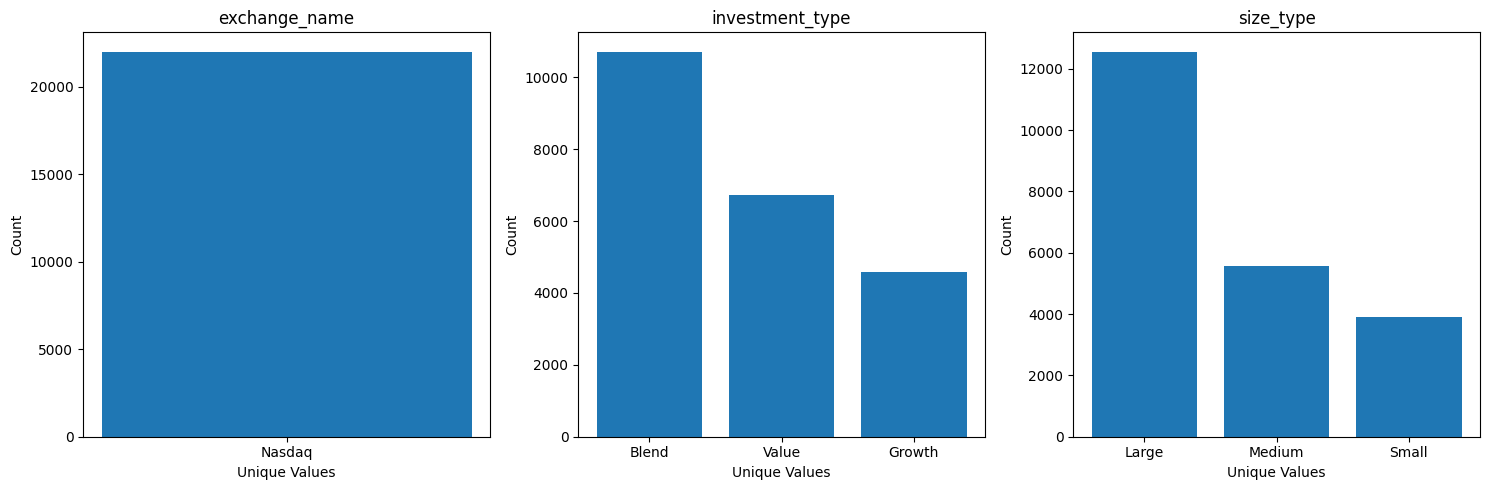

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 
for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    value_counts = mutual_fund[col].value_counts().sort_values(ascending=False) 
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_title(col)
    axs[i].set_xlabel('Unique Values')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

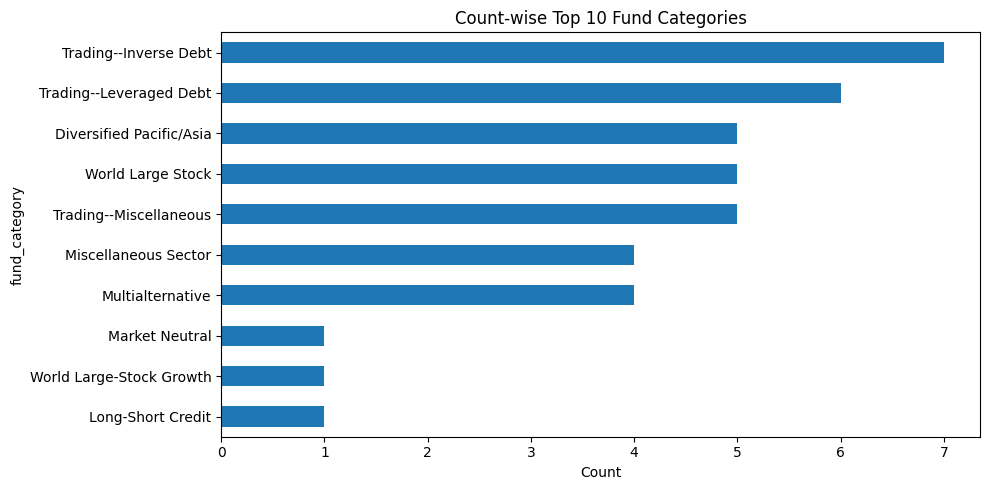

In [97]:
# Visualize fund categories
category_counts = mutual_fund['fund_category'].value_counts().sort_values(ascending=False) 
top_categories = category_counts[:10]
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
top_categories.plot(kind='barh', ax=axs)
axs.set_title('Count-wise Top 10 Fund Categories')
axs.set_xlabel('Count')
plt.tight_layout()
plt.show()

Visualize Numerical/Measureable features

In [117]:
measurable_var = ['fund_price_earning_ratio', 'fund_return_1year',
 'category_return_1year',
 'fund_return_5years',
 'category_return_5years',
 'fund_return_10years',
 'category_return_10years',
 'fund_annual_report_net_expense_ratio',
 'social_score', 'governance_score', 'environment_score', 'sustainability_score']

C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

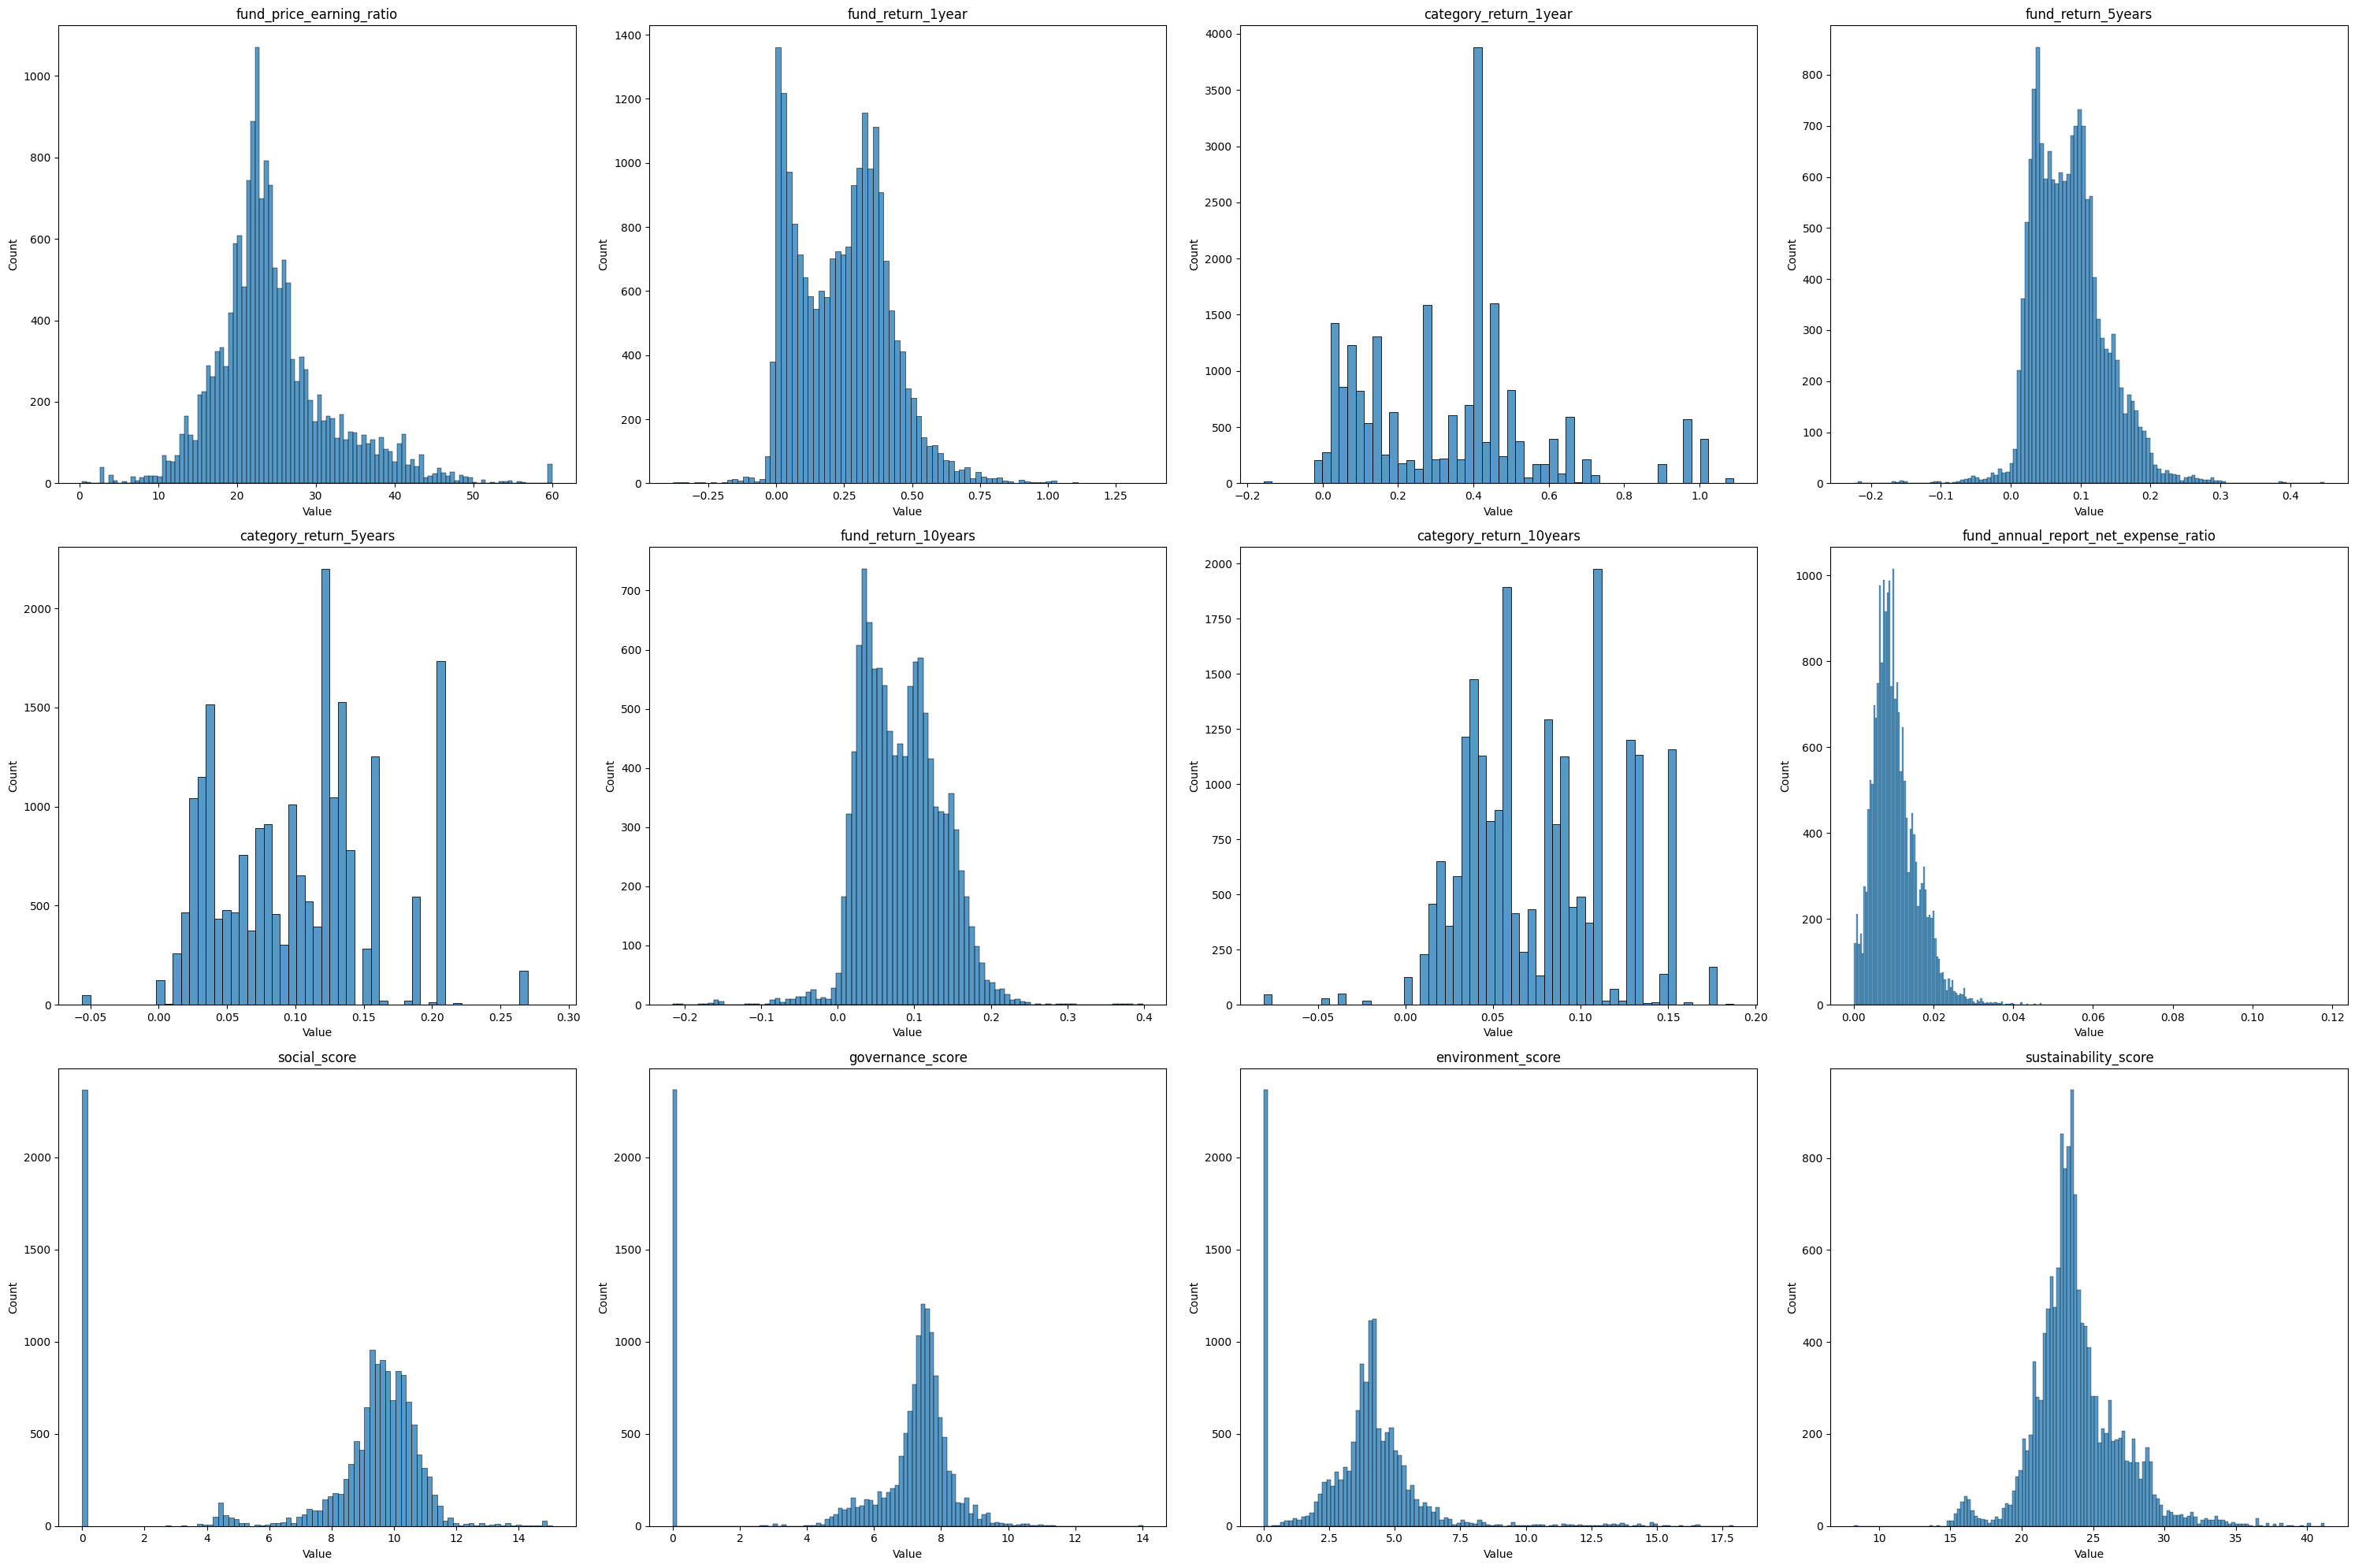

In [118]:
# Visualize measurable variables
fig, axs = plt.subplots(3, 4, figsize=(30, 20))
for i, col in enumerate(measurable_var):
    sns.histplot(mutual_fund[col], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(col)
    axs[i//4, i%4].set_xlabel('Value')
    axs[i//4, i%4].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [111]:
mutual_fund[measurable_var].describe()

,fund_price_earning_ratio,fund_return_1year,category_return_1year,fund_return_5years,category_return_5years,fund_return_10years,category_return_10years,fund_annual_report_net_expense_ratio,social_score,governance_score,environment_score,sustainability_score
count,16335.000000,21380.000000,21862.000000,16021.000000,21862.000000,11746.000000,21644.000000,21836.000000,14658.000000,14658.000000,14658.000000,14677.000000
mean,24.523717,0.244780,0.336799,0.083963,0.101496,0.083238,0.076052,0.010426,7.986915,6.163011,3.633489,23.813822
std,7.483535,0.174577,0.236312,0.052191,0.056228,0.051858,0.041442,0.005734,3.723071,2.834931,2.262139,3.014884
min,0.330000,-0.381100,-0.157200,-0.224100,-0.056000,-0.215400,-0.081000,0.000100,0.000000,0.000000,0.000000,8.250000
25%,20.200000,0.087900,0.132600,0.044100,0.048800,0.042100,0.042000,0.006600,8.140000,6.150000,2.700000,22.170000
50%,23.120000,0.253900,0.381300,0.080000,0.102200,0.080600,0.074100,0.009500,9.450000,7.330000,3.940000,23.420000
75%,27.350000,0.365200,0.445400,0.112700,0.133400,0.118400,0.108500,0.013300,10.200000,7.740000,4.670000,25.120000
max,59.990000,1.350300,1.090400,0.448580,0.288000,0.398600,0.187400,0.118000,15.080000,14.020000,17.920000,41.210000


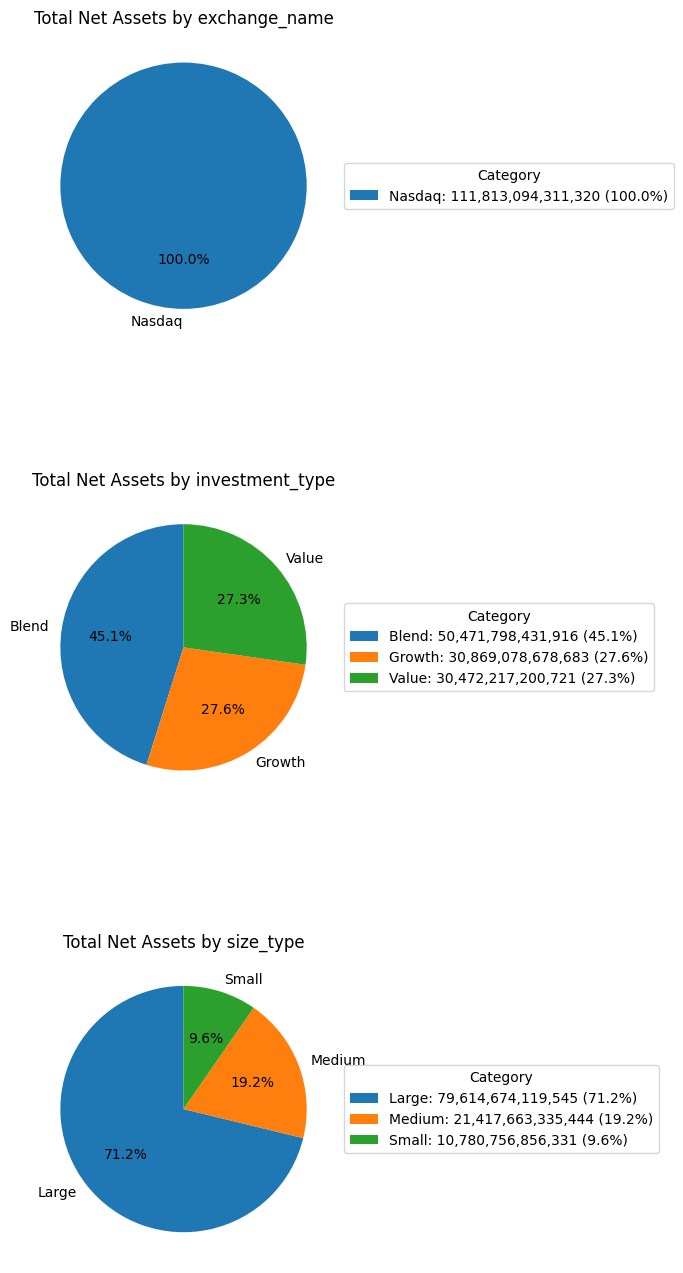

In [125]:
fig, axs = plt.subplots(3, 1, figsize=(6, 14))

# Loop through categorical variables
for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    data = mutual_fund.groupby(col)['total_net_assets'].sum().reset_index()
    ax = axs[i]
    wedges, texts, autotexts = ax.pie(data['total_net_assets'], labels=data[col], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Total Net Assets by {col}')
    abs_vals = [f'{val:,.0f}' for val in data['total_net_assets']]
    legend_labels = [f'{cat}: {abs_val} ({val/sum(data["total_net_assets"])*100:.1f}%)' for cat, abs_val, val in zip(data[col], abs_vals, data['total_net_assets'])]
    ax.legend(wedges, legend_labels, title='Category', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

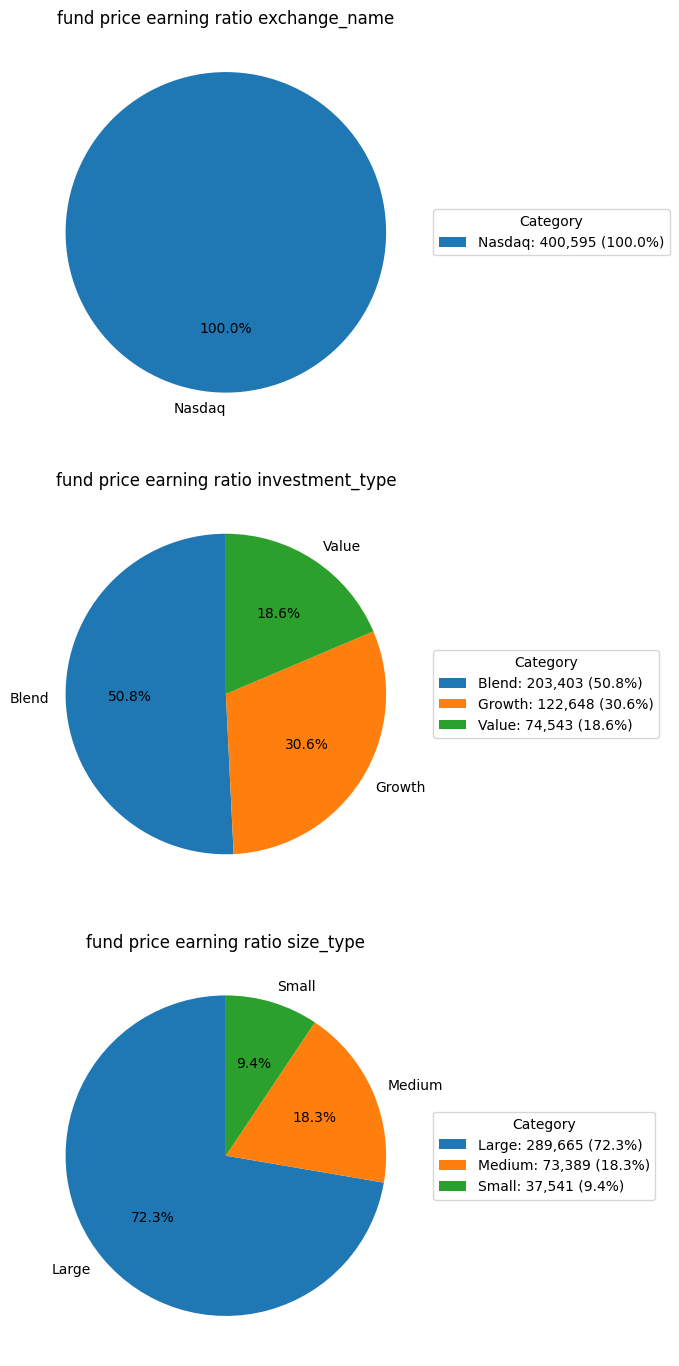

In [127]:
fig, axs = plt.subplots(3, 1, figsize=(6, 14))

# Loop through categorical variables
for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    data = mutual_fund.groupby(col)['fund_price_earning_ratio'].sum().reset_index()
    ax = axs[i]
    wedges, texts, autotexts = ax.pie(data['fund_price_earning_ratio'], labels=data[col], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'fund price earning ratio {col}')
    abs_vals = [f'{val:,.0f}' for val in data['fund_price_earning_ratio']]
    legend_labels = [f'{cat}: {abs_val} ({val/sum(data["fund_price_earning_ratio"])*100:.1f}%)' for cat, abs_val, val in zip(data[col], abs_vals, data['fund_price_earning_ratio'])]
    ax.legend(wedges, legend_labels, title='Category', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

Correlation Analysis

<Axes: >

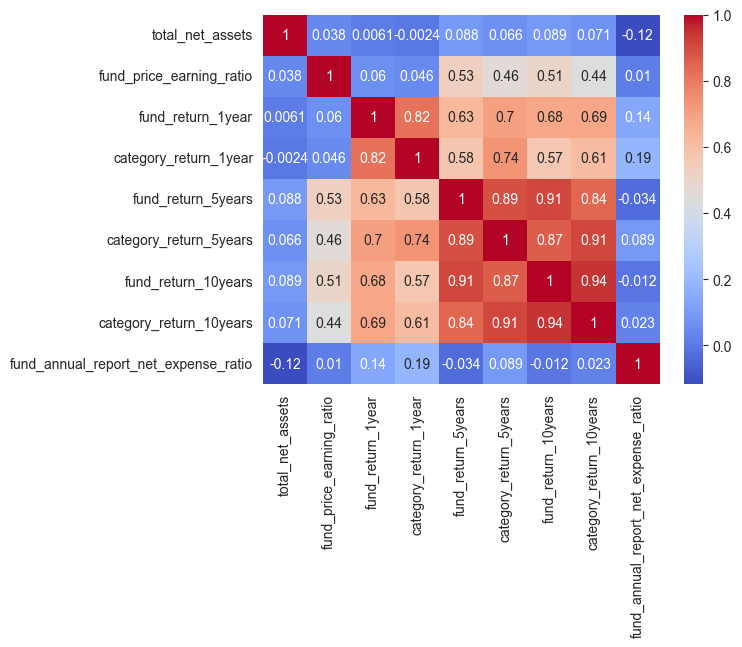

In [199]:
categorical_var = ['exchange_name', 'investment_type', 'size_type']
measurable_var = ['total_net_assets', 'fund_price_earning_ratio', 'fund_return_1year',
                  'category_return_1year', 'fund_return_5years', 'category_return_5years',
                  'fund_return_10years', 'category_return_10years', 
                  'fund_annual_report_net_expense_ratio']

scaled_data = StandardScaler().fit_transform(mutual_fund[measurable_var])

corr_matrix = pd.DataFrame(scaled_data, columns=measurable_var).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Mutual funds prices

In [152]:
print(len(mf_prices))
mf_prices.head(5)

75657739


,fund_symbol,price_date,nav_per_share
0,AAAAX,2007-07-31,10.02
1,AAAAX,2007-08-01,9.98
2,AAAAX,2007-08-02,10.01
3,AAAAX,2007-08-03,9.90
4,AAAAX,2007-08-06,9.93


In [153]:
# Date range available
print(f"Date range available: {mf_prices['price_date'].min()} to {mf_prices['price_date'].max()}")

Date range available: 1973-05-03 00:00:00 to 2021-11-30 00:00:00


In [154]:
# Subset of data from 2020 to 2021 max date
mf_prices = mf_prices[mf_prices['price_date'] >= '2020-01-01']


In [155]:
mf_prices

,fund_symbol,price_date,nav_per_share
3128,AAAAX,2020-01-02,10.60
3129,AAAAX,2020-01-03,10.61
3130,AAAAX,2020-01-06,10.63
3131,AAAAX,2020-01-07,10.59
3132,AAAAX,2020-01-08,10.57
...,...,...,...
75657734,ZVNIX,2021-11-23,42.88
75657735,ZVNIX,2021-11-24,43.74
75657736,ZVNIX,2021-11-26,43.19
75657737,ZVNIX,2021-11-29,43.75


In [156]:
categorical_cols= ['exchange_name', 'investment_type', 'size_type', 'fund_category'] 
mf_prices = mf_prices.merge(mutual_fund[categorical_cols + ['fund_symbol']], on='fund_symbol', how='left')
mf_prices

,fund_symbol,price_date,nav_per_share,exchange_name,investment_type,size_type,fund_category
0,AAAAX,2020-01-02,10.60,Nasdaq,Value,Large,World Allocation
1,AAAAX,2020-01-03,10.61,Nasdaq,Value,Large,World Allocation
2,AAAAX,2020-01-06,10.63,Nasdaq,Value,Large,World Allocation
3,AAAAX,2020-01-07,10.59,Nasdaq,Value,Large,World Allocation
4,AAAAX,2020-01-08,10.57,Nasdaq,Value,Large,World Allocation
...,...,...,...,...,...,...,...
11203137,ZVNIX,2021-11-23,42.88,Nasdaq,Growth,Large,Large Growth
11203138,ZVNIX,2021-11-24,43.74,Nasdaq,Growth,Large,Large Growth
11203139,ZVNIX,2021-11-26,43.19,Nasdaq,Growth,Large,Large Growth
11203140,ZVNIX,2021-11-29,43.75,Nasdaq,Growth,Large,Large Growth


In [ ]:
mf_prices.set_index('price_date', inplace=True)


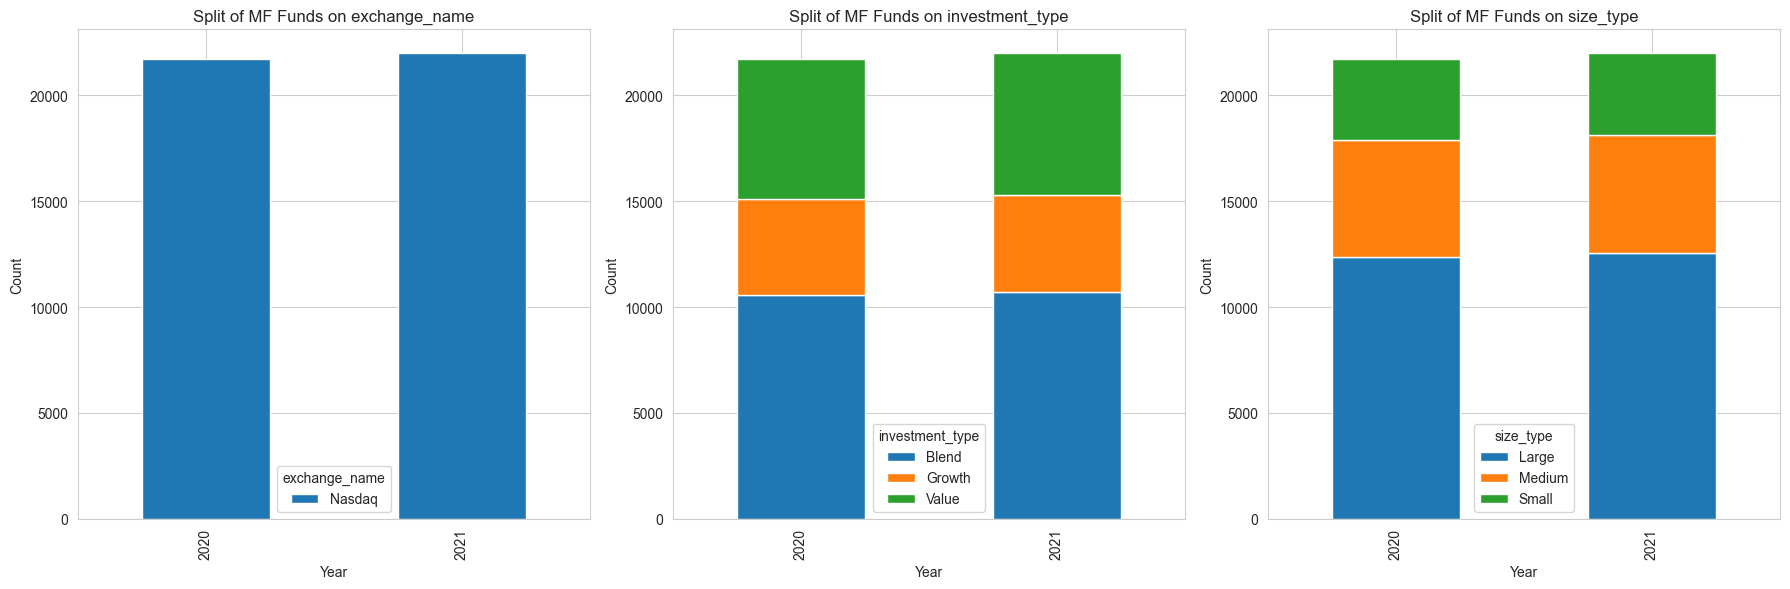

In [160]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    mf_category_count_df = mf_prices.groupby([mf_prices.index.year, col])['fund_symbol'].nunique().reset_index(name='count')
    mf_category_count_pivot = mf_category_count_df.pivot(index='price_date', columns=col, values='count').fillna(0)
    
    sns.set_style('whitegrid')
    ax = axs[i]
    mf_category_count_pivot.plot(kind='bar', stacked=True, ax=ax) 
    ax.set_title(f'Split of MF Funds on {col}')
    ax.set_xlabel('Year')
    ax.set_xticklabels(mf_category_count_pivot.index, rotation=90)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


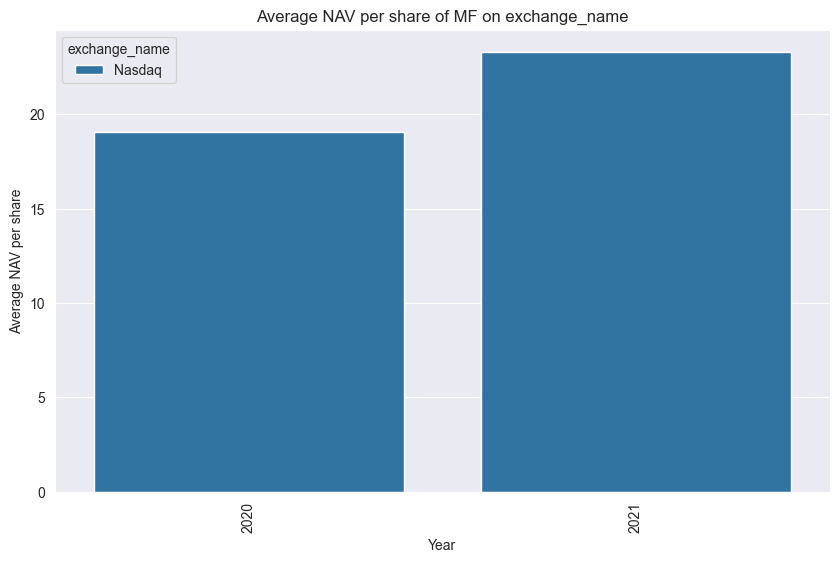

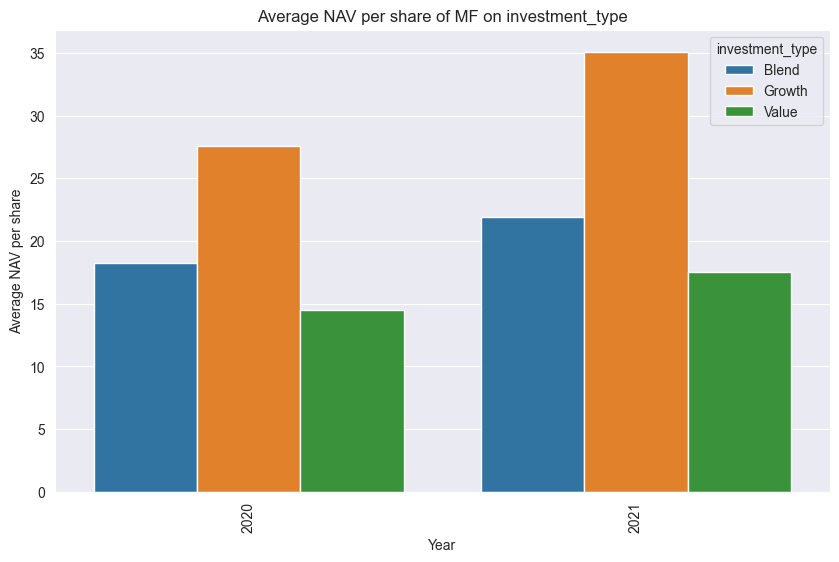

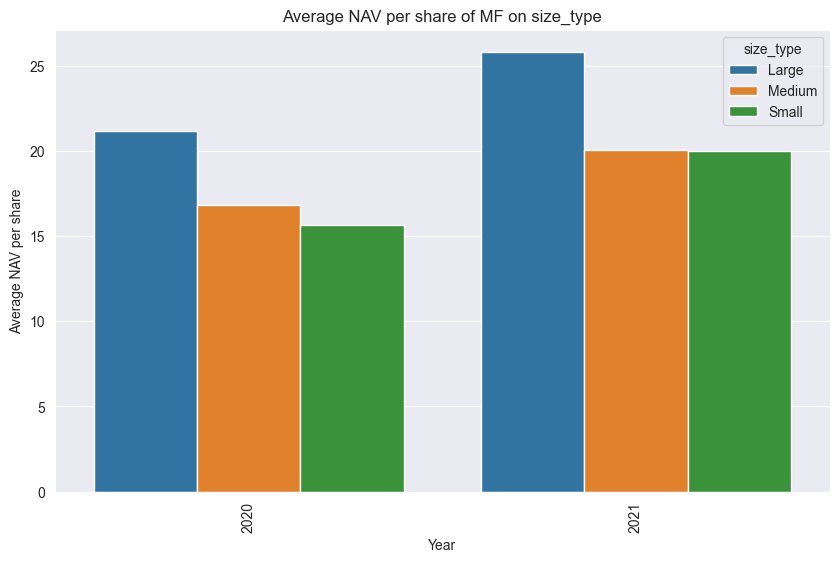

In [164]:
for col in ['exchange_name', 'investment_type', 'size_type']:
    mf_nav_df = mf_prices.groupby([mf_prices.index.year, col])['nav_per_share'].mean().reset_index(name='average_nav_per_share')
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(data=mf_nav_df, x='price_date', y='average_nav_per_share', hue=col)
    plt.title(f'Average NAV per share of MF on {col}')
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel('Average NAV per share')
    plt.legend(title=col)
    plt.show()


## ETF 

In [187]:
categorical_cols = ['exchange_name', 'investment_type', 'size_type', 'fund_category']
print("Column : Unieque Values")
for col in categorical_cols:
    num_unique = len(etf[col].unique())
    print(f"{col} : {num_unique}")

Column : Unieque Values
exchange_name : 3
investment_type : 3
size_type : 3
fund_category : 62


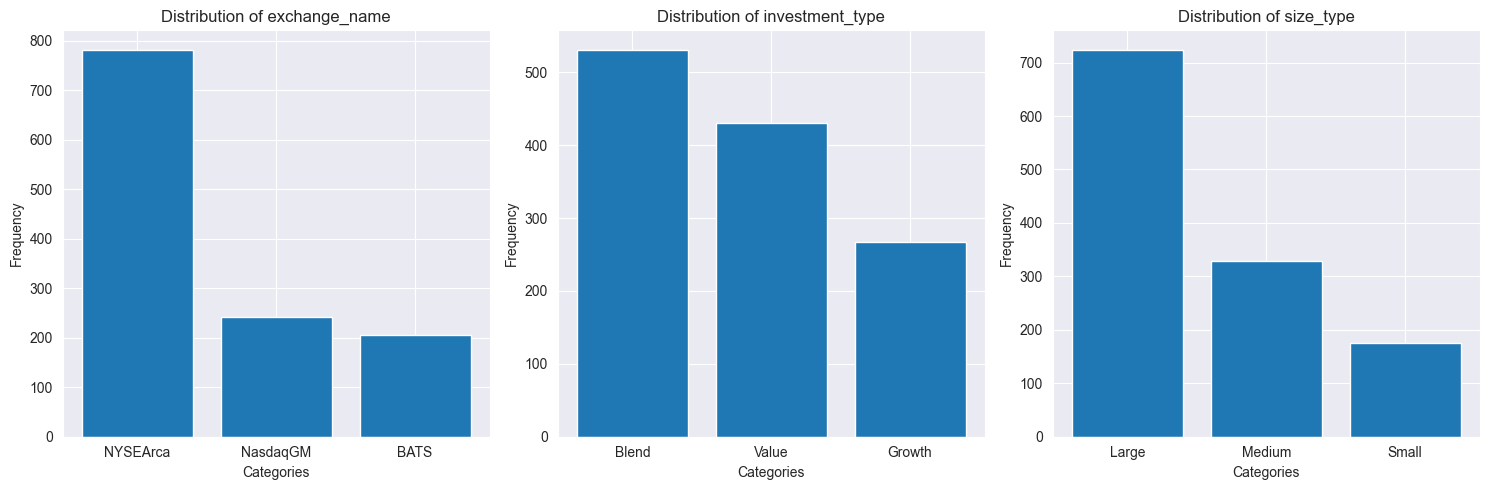

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
for i, category in enumerate(['exchange_name', 'investment_type', 'size_type']):
    counts = etf[category.lower().replace(' ', '_')].value_counts().sort_values(ascending=False) 
    axes[i].bar(counts.index, counts.values) 
    axes[i].set_title(f'Distribution of {category}')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


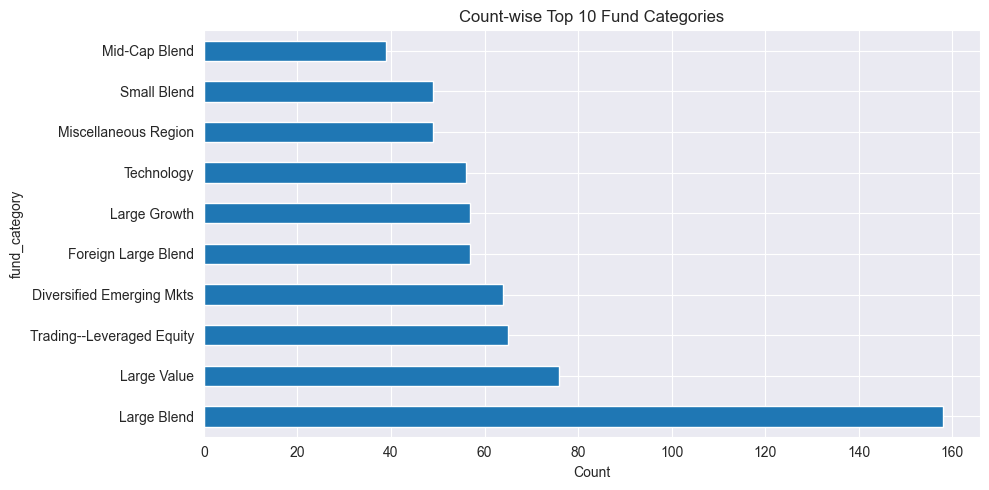

In [197]:
category_counts = etf['fund_category'].value_counts().sort_values(ascending=False)
top_categories = category_counts[:10]
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
top_categories.plot(kind='barh', ax=axs)
axs.set_title('Count-wise Top 10 Fund Categories')
axs.set_xlabel('Count')
plt.tight_layout()
plt.show()

C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjain\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

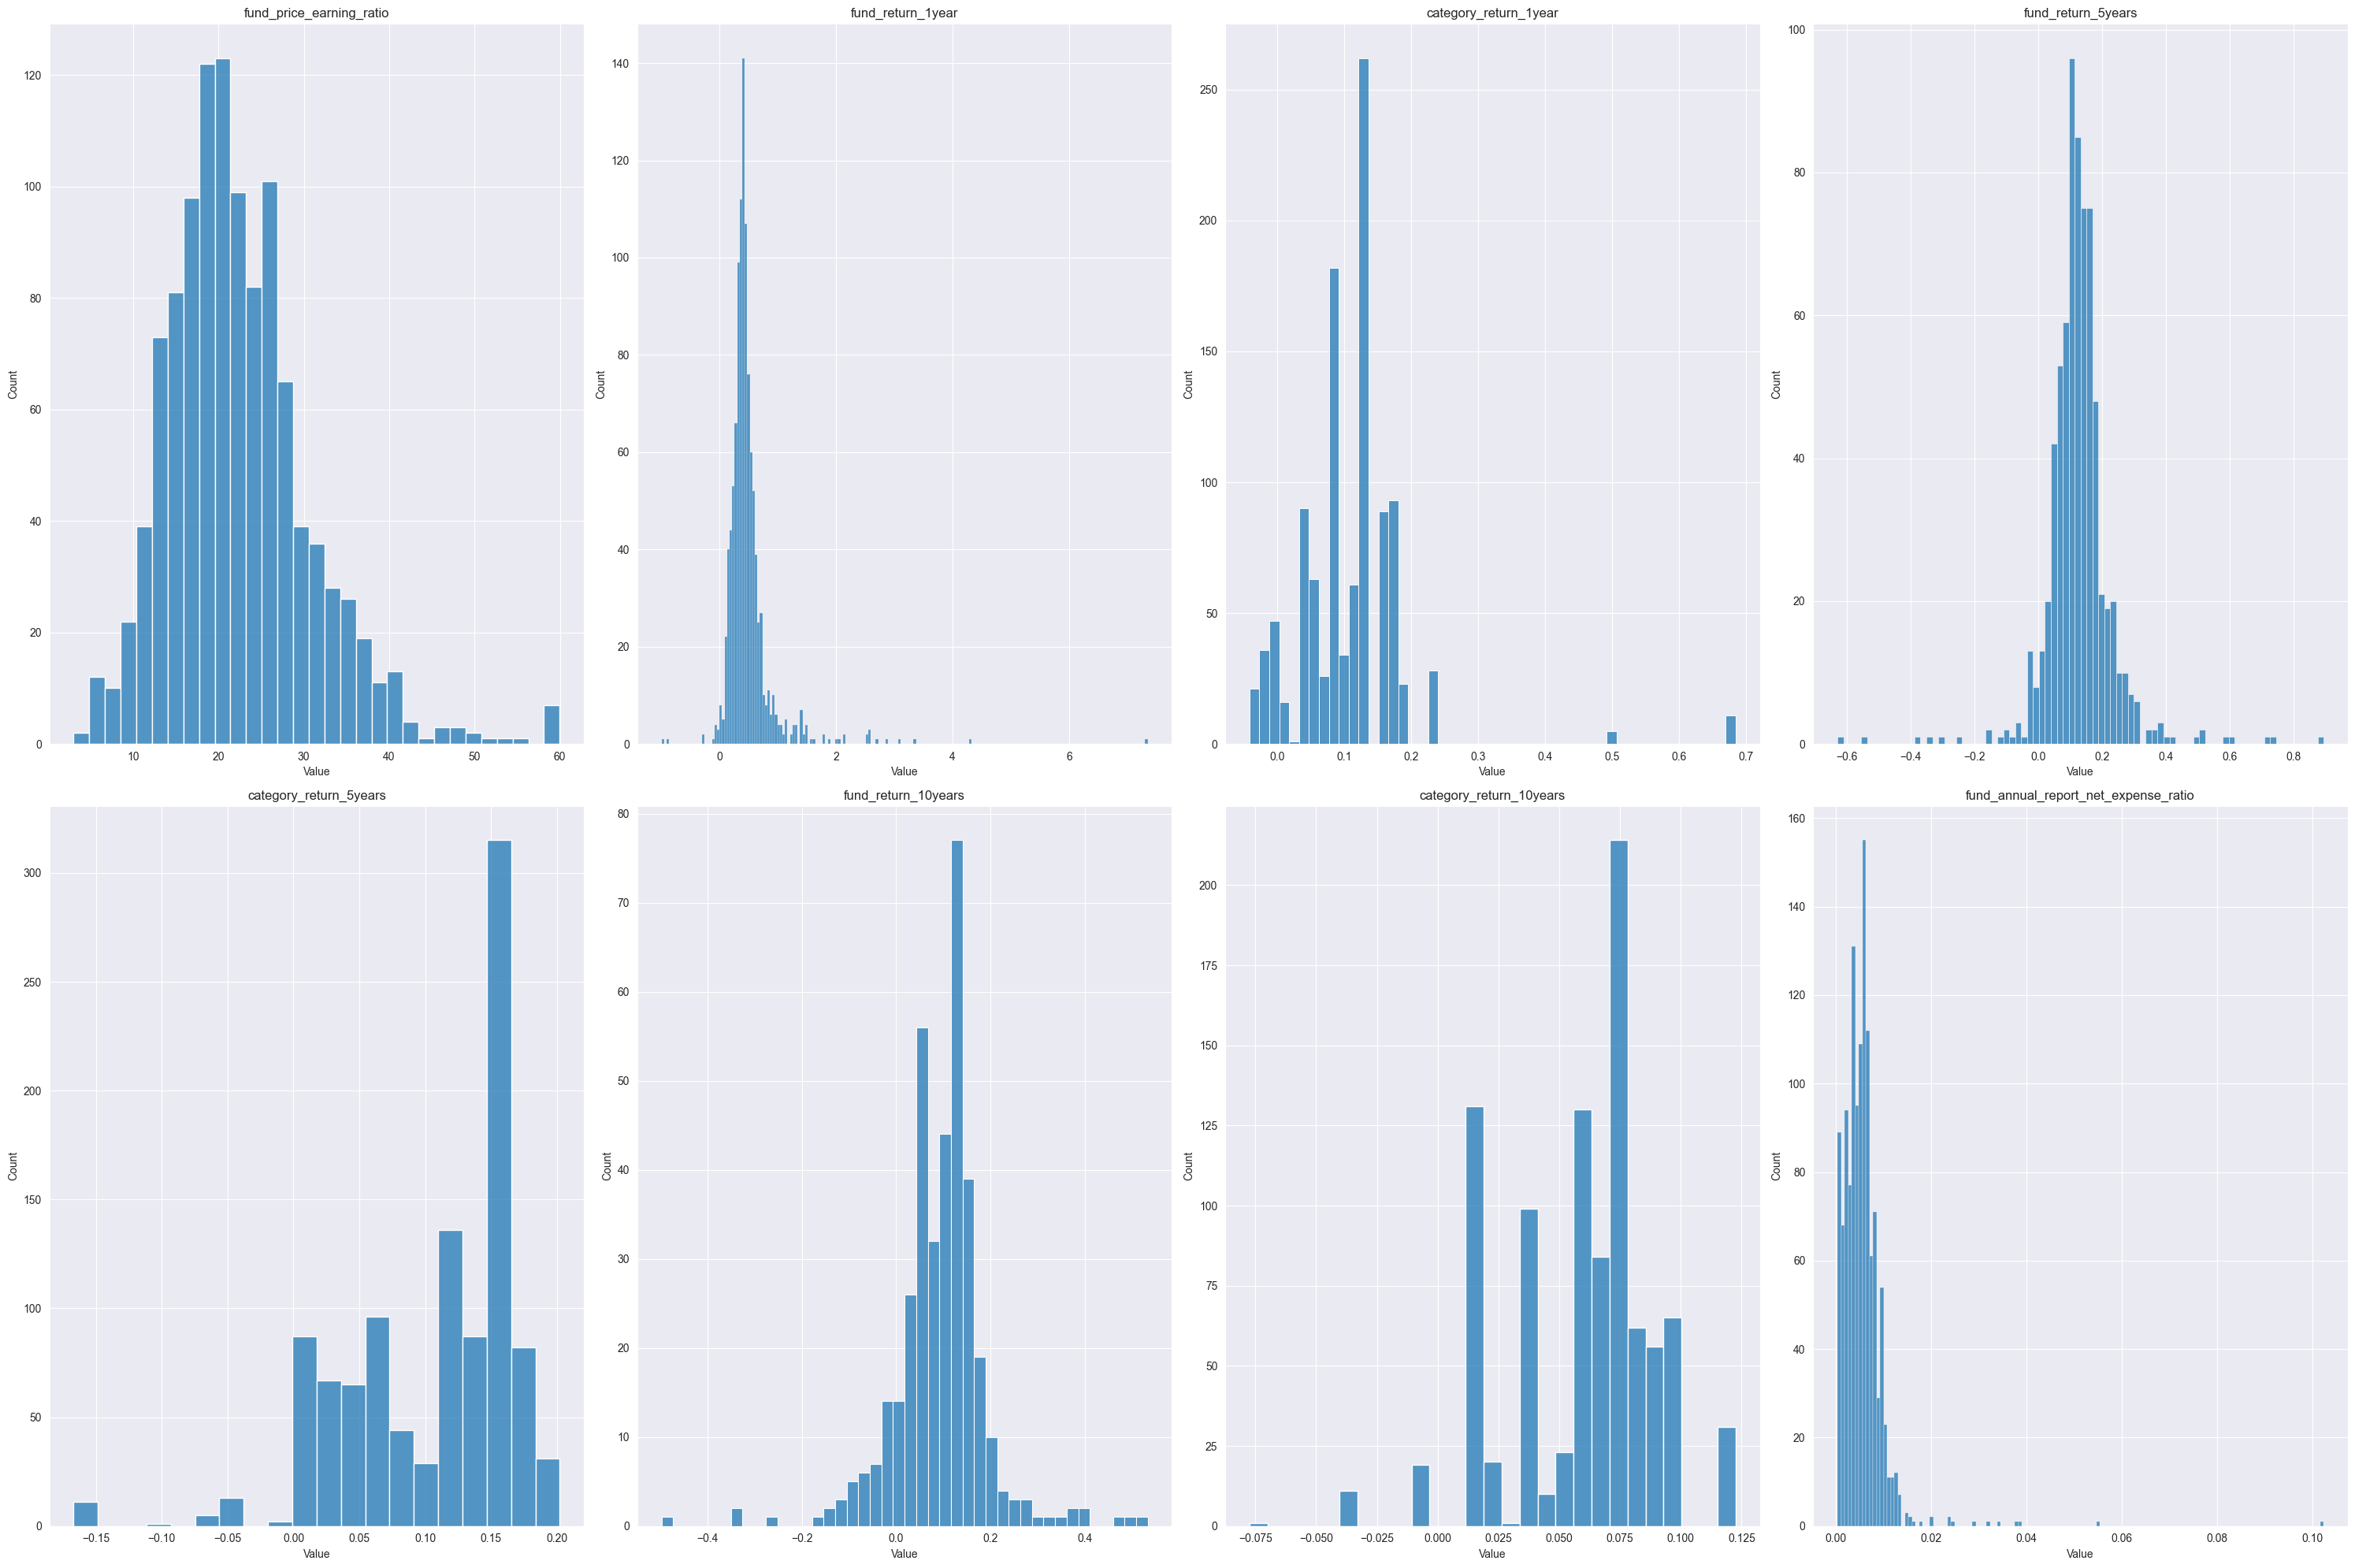

In [202]:
measurable_var = ['fund_price_earning_ratio', 'fund_return_1year',
                  'category_return_1year', 'fund_return_5years', 'category_return_5years',
                  'fund_return_10years', 'category_return_10years', 
                  'fund_annual_report_net_expense_ratio']
# Visualize measurable variables
fig, axs = plt.subplots(2, 4, figsize=(30, 20))
for i, col in enumerate(measurable_var):
    sns.histplot(etf[col], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(col)
    axs[i//4, i%4].set_xlabel('Value')
    axs[i//4, i%4].set_ylabel('Count')

plt.tight_layout()
plt.show()

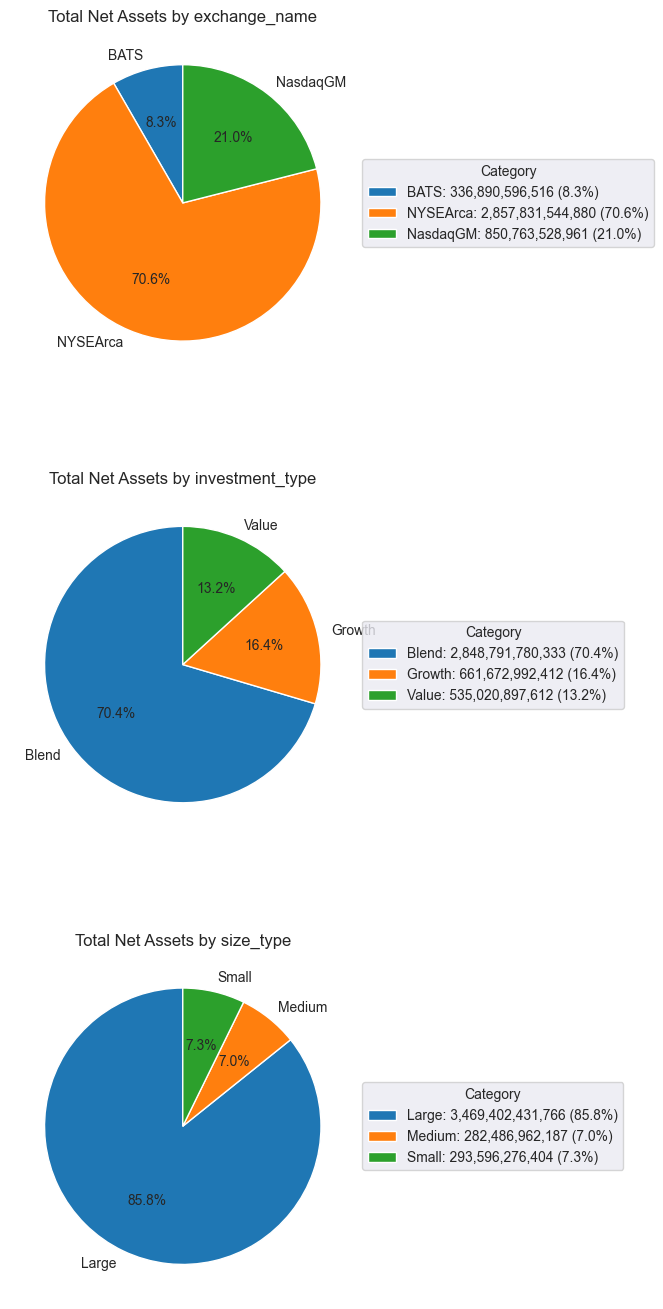

In [203]:
fig, axs = plt.subplots(3, 1, figsize=(6, 14))

# Loop through categorical variables
for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    data = etf.groupby(col)['total_net_assets'].sum().reset_index()
    ax = axs[i]
    wedges, texts, autotexts = ax.pie(data['total_net_assets'], labels=data[col], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Total Net Assets by {col}')
    abs_vals = [f'{val:,.0f}' for val in data['total_net_assets']]
    legend_labels = [f'{cat}: {abs_val} ({val/sum(data["total_net_assets"])*100:.1f}%)' for cat, abs_val, val in zip(data[col], abs_vals, data['total_net_assets'])]
    ax.legend(wedges, legend_labels, title='Category', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

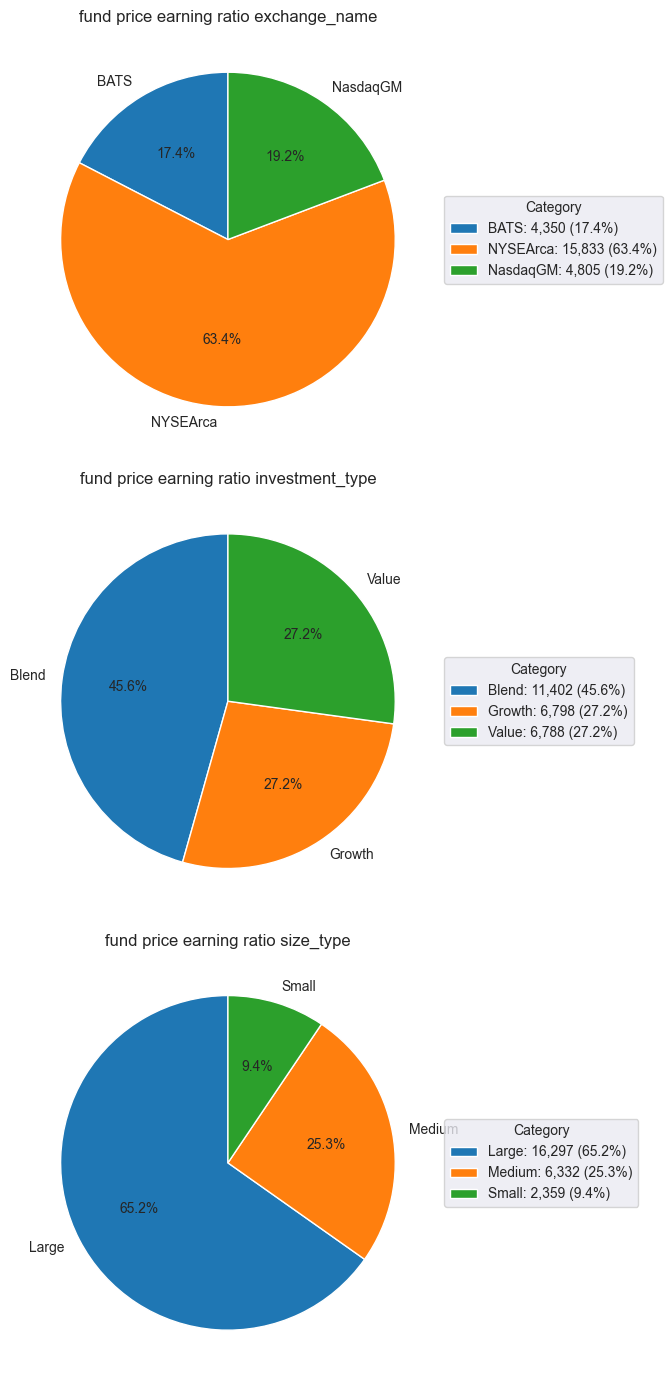

In [204]:
fig, axs = plt.subplots(3, 1, figsize=(6, 14))

# Loop through categorical variables
for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    data = etf.groupby(col)['fund_price_earning_ratio'].sum().reset_index()
    ax = axs[i]
    wedges, texts, autotexts = ax.pie(data['fund_price_earning_ratio'], labels=data[col], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'fund price earning ratio {col}')
    abs_vals = [f'{val:,.0f}' for val in data['fund_price_earning_ratio']]
    legend_labels = [f'{cat}: {abs_val} ({val/sum(data["fund_price_earning_ratio"])*100:.1f}%)' for cat, abs_val, val in zip(data[col], abs_vals, data['fund_price_earning_ratio'])]
    ax.legend(wedges, legend_labels, title='Category', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

Correlation Analysis

<Axes: >

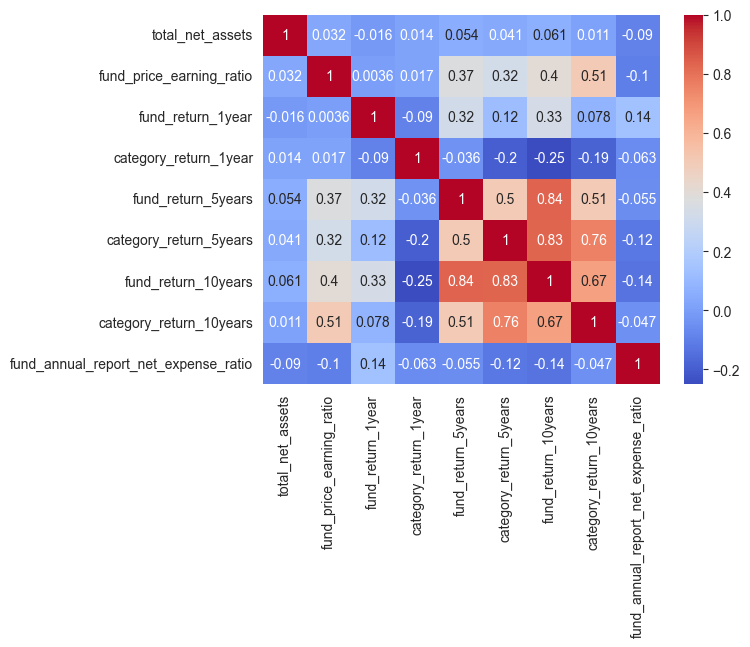

In [205]:
categorical_var = ['exchange_name', 'investment_type', 'size_type']
measurable_var = ['total_net_assets', 'fund_price_earning_ratio', 'fund_return_1year',
                  'category_return_1year', 'fund_return_5years', 'category_return_5years',
                  'fund_return_10years', 'category_return_10years', 
                  'fund_annual_report_net_expense_ratio']

scaled_data = StandardScaler().fit_transform(etf[measurable_var])

corr_matrix = pd.DataFrame(scaled_data, columns=measurable_var).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## ETF prices

In [226]:
etf_prices

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
3866025,ZSL,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
3866026,ZSL,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
3866027,ZSL,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
3866028,ZSL,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


In [227]:
etf_prices = etf_prices[etf_prices['price_date'] >= '2020-01-01']

In [228]:
# Data Merge
# Data Merge without suffixes
etf_prices = etf_prices.merge(etf[['exchange_name', 'investment_type', 'size_type', 'fund_category', 'fund_family', 'fund_symbol']], on='fund_symbol', how='left', suffixes=('', ''))
etf_prices.head(5)


,fund_symbol,price_date,open,high,low,close,adj_close,volume,exchange_name,investment_type,size_type,fund_category,fund_family
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300,NaN,NaN,NaN,NaN,NaN
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500,NaN,NaN,NaN,NaN,NaN
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400,NaN,NaN,NaN,NaN,NaN
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100,NaN,NaN,NaN,NaN,NaN
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100,NaN,NaN,NaN,NaN,NaN


In [229]:
etf_prices['price_date'] = pd.to_datetime(etf_prices['price_date']) 
etf_prices.set_index('price_date', inplace=True)

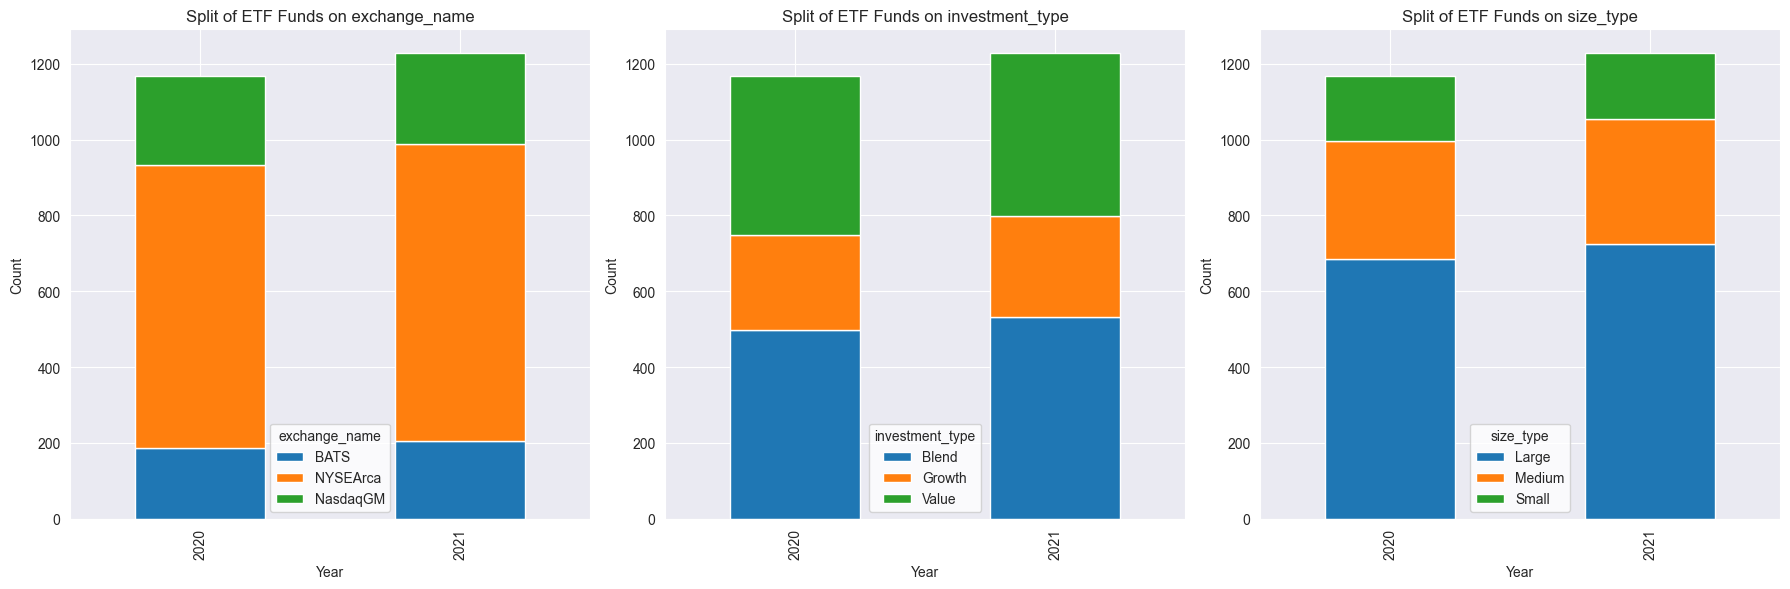

In [230]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['exchange_name', 'investment_type', 'size_type']):
    mf_category_count_df = etf_prices.groupby([etf_prices.index.year, col])['fund_symbol'].nunique().reset_index(name='count')
    mf_category_count_pivot = mf_category_count_df.pivot(index='price_date', columns=col, values='count').fillna(0)
    
    sns.set_style('whitegrid')
    ax = axs[i]
    mf_category_count_pivot.plot(kind='bar', stacked=True, ax=ax) 
    ax.set_title(f'Split of ETF Funds on {col}')
    ax.set_xlabel('Year')
    ax.set_xticklabels(mf_category_count_pivot.index, rotation=90)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()